In [153]:
import pandas as pd
import numpy as np
from utils import sankey_plot_with_labels

RESULTS_FOLDER = 'results/'
CELLTYPIST_HIGH_PATH = 'results/celltypist_labels_Immune_All_High.csv'
CELLTYPIST_LOW_PATH = 'results/celltypist_labels_Immune_All_Low.csv'
CELL_TYPES_PER_CLUSTER_PATH = 'results/celltypes_labels_from_antibody_clusters.csv'
CLUSTER_LABELS_PATH = 'results/cluster_labels.csv'

Import data:

In [154]:
cluster_labels_df = pd.read_csv(CLUSTER_LABELS_PATH, index_col=0)
cluster_labels_df.head(2)

,leiden
AAACCCAAGACTGTTC-1,6
AAACCCAAGGATCATA-1,3


In [155]:
celltypes_per_cluster_df = pd.read_csv(CELL_TYPES_PER_CLUSTER_PATH, index_col=0)
celltypes_per_cluster_df.head(2)

,CellTypist,Literature,Litterature (T Cells subtypes)
0,T Cell,CD4 T Cell,CD8 T Cell
1,T Cell,CD4 T Cell,CD8 T Cell


Select most predicted labels for each cluster:

In [156]:
celltypist_high_df = pd.read_csv(CELLTYPIST_HIGH_PATH, index_col=0)
celltypist_high_df['antibody_cluster'] = cluster_labels_df['leiden']
celltypist_high_df.head(2)

,predicted_labels,over_clustering,majority_voting,antibody_cluster
AAACCCAAGACTGTTC-1,T cells,338,T cells,6
AAACCCAAGGATCATA-1,T cells,28,T cells,3


In [157]:
celltypist_low_df = pd.read_csv(CELLTYPIST_LOW_PATH, index_col=0)
celltypist_low_df['antibody_cluster'] = cluster_labels_df['leiden']
celltypist_low_df.head(2)

,predicted_labels,over_clustering,majority_voting,antibody_cluster
AAACCCAAGACTGTTC-1,Regulatory T cells,338,Tem/Trm cytotoxic T cells,6
AAACCCAAGGATCATA-1,Tcm/Naive cytotoxic T cells,28,Tcm/Naive cytotoxic T cells,3


In [158]:
# find the most common cell type in each cluster    
for cluster in range(16):
    cluster_df = celltypist_high_df[celltypist_high_df['antibody_cluster'] == cluster]
    most_common_celltype = cluster_df['predicted_labels'].value_counts().idxmax()
    celltypes_per_cluster_df.loc[cluster, 'cell_typist_high'] = most_common_celltype
    
    cluster_df = celltypist_low_df[celltypist_low_df['antibody_cluster'] == cluster]
    most_common_celltype = cluster_df['predicted_labels'].value_counts().idxmax()
    celltypes_per_cluster_df.loc[cluster, 'cell_typist_low'] = most_common_celltype

celltypes_per_cluster_df

,CellTypist,Literature,Litterature (T Cells subtypes),cell_typist_high,cell_typist_low
0,T Cell,CD4 T Cell,CD8 T Cell,T cells,Tcm/Naive helper T cells
1,T Cell,CD4 T Cell,CD8 T Cell,T cells,Tcm/Naive helper T cells
2,B Cell,NaN,NaN,B cells,Naive B cells
3,T Cell,T Cell,CD8 T Cell,T cells,Tcm/Naive cytotoxic T cells
4,T Cell,T Cell,CD8 T Cell,T cells,Tem/Trm cytotoxic T cells
5,ILC,NK Cell,CD8 T Cell,ILC,CD16+ NK cells
6,NaN,NaN,CD8 T Cell,T cells,Tem/Temra cytotoxic T cells
7,NaN,T Cell,CD8 T Cell,T cells,MAIT cells
8,B Cell,B Cell,NaN,B cells,Memory B cells
9,B Cell,B Cell,Naive T Cell,B cells,Tcm/Naive helper T cells


In [159]:
celltypes_per_cluster_df['cell_typist_high'].value_counts()

cell_typist_high
T cells                     10
B cells                      3
ILC                          1
Monocytes                    1
Megakaryocytes/platelets     1
Name: count, dtype: int64

In [160]:
celltypes_per_cluster_df['cell_typist_low'].value_counts()

cell_typist_low
Tcm/Naive helper T cells       6
Tem/Temra cytotoxic T cells    2
Naive B cells                  1
Tcm/Naive cytotoxic T cells    1
Tem/Trm cytotoxic T cells      1
CD16+ NK cells                 1
MAIT cells                     1
Memory B cells                 1
Classical monocytes            1
Megakaryocytes/platelets       1
Name: count, dtype: int64

In [161]:
display(celltypes_per_cluster_df['CellTypist'].unique())
display(celltypes_per_cluster_df['Literature'].unique())
display(celltypes_per_cluster_df['Litterature (T Cells subtypes)'].unique())
display(celltypes_per_cluster_df['cell_typist_high'].unique())
display(celltypes_per_cluster_df['cell_typist_low'].unique())

array(['T Cell', 'B Cell', 'ILC', nan, 'Monocytes', 'HSC/MPP'],
      dtype=object)

array(['CD4 T Cell', nan, 'T Cell', 'NK Cell', 'B Cell', 'Monocytes'],
      dtype=object)

array(['CD8 T Cell', nan, 'Naive T Cell', 'CD4 T Cell'], dtype=object)

array(['T cells', 'B cells', 'ILC', 'Monocytes',
       'Megakaryocytes/platelets'], dtype=object)

array(['Tcm/Naive helper T cells', 'Naive B cells',
       'Tcm/Naive cytotoxic T cells', 'Tem/Trm cytotoxic T cells',
       'CD16+ NK cells', 'Tem/Temra cytotoxic T cells', 'MAIT cells',
       'Memory B cells', 'Classical monocytes',
       'Megakaryocytes/platelets'], dtype=object)

In [162]:
cell_names_mapping = {
    'Tcm/Naive helper T cells': 'CD8 T Cell',
    'Tcm/Naive cytotoxic T cells': 'CD8 T Cell',
    'Classical monocytes': 'Monocytes',
    'CD16+ NK cells': 'NK cells',
}

In [163]:
# change the cell type names to match the literature
celltypes_per_cluster_df['cell_typist_high'] = celltypes_per_cluster_df['cell_typist_high'].replace(cell_names_mapping)
celltypes_per_cluster_df['cell_typist_low'] = celltypes_per_cluster_df['cell_typist_low'].replace(cell_names_mapping)

In [164]:
# Nan as srtring
celltypes_per_cluster_df = celltypes_per_cluster_df.fillna('None')

In [165]:
celltypes_per_cluster_df

,CellTypist,Literature,Litterature (T Cells subtypes),cell_typist_high,cell_typist_low
0,T Cell,CD4 T Cell,CD8 T Cell,T cells,CD8 T Cell
1,T Cell,CD4 T Cell,CD8 T Cell,T cells,CD8 T Cell
2,B Cell,None,None,B cells,Naive B cells
3,T Cell,T Cell,CD8 T Cell,T cells,CD8 T Cell
4,T Cell,T Cell,CD8 T Cell,T cells,Tem/Trm cytotoxic T cells
5,ILC,NK Cell,CD8 T Cell,ILC,NK cells
6,None,None,CD8 T Cell,T cells,Tem/Temra cytotoxic T cells
7,None,T Cell,CD8 T Cell,T cells,MAIT cells
8,B Cell,B Cell,None,B cells,Memory B cells
9,B Cell,B Cell,Naive T Cell,B cells,CD8 T Cell


### Comparison

'CellType' was inferred from the protein clusters.

In [166]:
sankey_plot_with_labels(
    labels=[celltypes_per_cluster_df['CellTypist'], celltypes_per_cluster_df['Literature'],
    celltypes_per_cluster_df['Litterature (T Cells subtypes)'], celltypes_per_cluster_df['cell_typist_high'],
    celltypes_per_cluster_df['cell_typist_low']],
    labels_titles=['CellTypist Genes', 'Literature', 'Litterature (T Cells subtypes)', 'Cell Typist High', 'Cell Typist Low'],
    title='Sankey plot of cell types'
    )

### Assing Cell Types to each Cell

In [168]:
#assign the cell types to each cel
cluster_labels_df.head(2)

,leiden
AAACCCAAGACTGTTC-1,6
AAACCCAAGGATCATA-1,3


In [169]:
def assign_cell_types_to_cells(cluster, column):
    cell_type = celltypes_per_cluster_df.loc[cluster, column]
    return cell_type

for column in ['CellTypist', 'Literature', 'Litterature (T Cells subtypes)', 'cell_typist_high', 'cell_typist_low']:
    cluster_labels_df[column] = cluster_labels_df['leiden'].apply(lambda x: assign_cell_types_to_cells(x, column))


# rename the columns
cluster_labels_df = cluster_labels_df.rename(columns={
    'cell_typist_high': 'CellTypist High',
    'cell_typist_low': 'CellTypist Low',
})

In [170]:
cluster_labels_df.sample(10)

,leiden,CellTypist,Literature,Litterature (T Cells subtypes),CellTypist High,CellTypist Low
GTCCTCAGTCGAACGA-13,2,B Cell,None,None,B cells,Naive B cells
GTGAGCCAGCGACTGA-15,1,T Cell,CD4 T Cell,CD8 T Cell,T cells,CD8 T Cell
ACTTTGTGTTGCATTG-1,4,T Cell,T Cell,CD8 T Cell,T cells,Tem/Trm cytotoxic T cells
TCGGATAAGTGTTGAA-15,0,T Cell,CD4 T Cell,CD8 T Cell,T cells,CD8 T Cell
TCTATCACATTCTTCA-18,2,B Cell,None,None,B cells,Naive B cells
AGTACTGTCCTTCACG-16,0,T Cell,CD4 T Cell,CD8 T Cell,T cells,CD8 T Cell
CAACGATGTATACCCA-7,5,ILC,NK Cell,CD8 T Cell,ILC,NK cells
AACCAACGTGAGTTGG-17,5,ILC,NK Cell,CD8 T Cell,ILC,NK cells
GTGATGTAGCAAGTCG-16,8,B Cell,B Cell,None,B cells,Memory B cells
AGGGCTCCAATCGTCA-11,1,T Cell,CD4 T Cell,CD8 T Cell,T cells,CD8 T Cell


In [179]:
import matplotlib.pyplot as plt

In [188]:
count_df

,CellTypist,Literature,Litterature (T Cells subtypes),CellTypist High,CellTypist Low
B Cell,13555.0,3381.0,0.0,0.0,0.0
B cells,0.0,0.0,0.0,13555.0,0.0
CD4 T Cell,0.0,27078.0,801.0,0.0,0.0
CD8 T Cell,0.0,0.0,57132.0,0.0,38229.0
HSC/MPP,763.0,0.0,0.0,0.0,0.0
ILC,6747.0,0.0,0.0,6747.0,0.0
MAIT cells,0.0,0.0,0.0,0.0,2344.0
Megakaryocytes/platelets,0.0,0.0,0.0,44.0,44.0
Memory B cells,0.0,0.0,0.0,0.0,2310.0
Monocytes,773.0,773.0,0.0,773.0,773.0


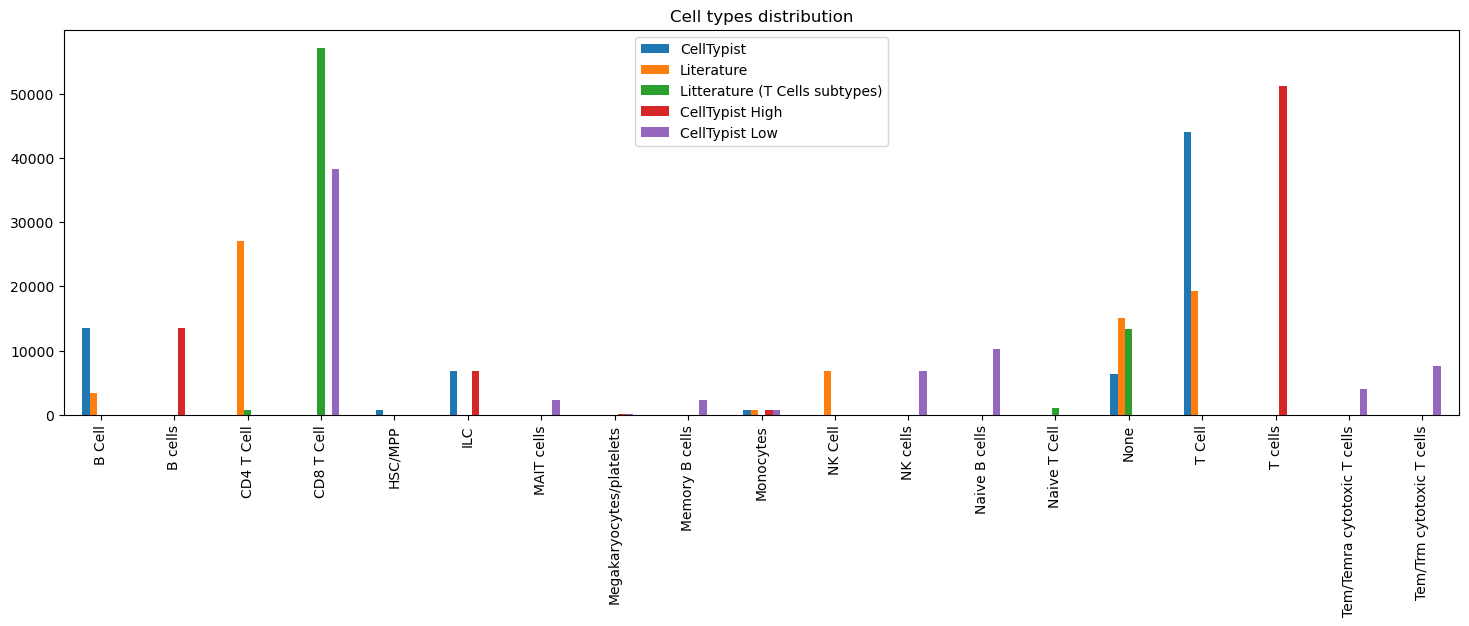

In [194]:
count_df = cluster_labels_df[['CellTypist', 'Literature', 'Litterature (T Cells subtypes)', 
        'CellTypist High', 'CellTypist Low']].apply(pd.Series.value_counts)
count_df = count_df.fillna(0)

count_df.plot(kind='bar', stacked=False, figsize=(18, 5));
plt.title('Cell types distribution');

In [195]:
cluster_labels_df.to_csv('results/GSE239626_cell_types.csv')